In [1]:
# If necessary, install packages
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# file IDs and table namesfor lobbying data files from Google Drive
lob_rpt = ("1CIq7XwaFTJmnUKdAvYyh53Et2XSJRX9d", "lob_rpt")
lob_lobbyist = ("1q1ZyLvUhsxsbPLdi_CmrNH0FqLoorr6p", "lob_lobbyist")
lob_lobbying = ("19Jef89spXbkExNpYA-s_e8GRii-0tReu", "lob_lobbying")
lob_issue = ("18-D_vW4dAHJlvFs4ARK4lgx6KdsAXWoq", "lob_issue")
lob_indus = ("1yldZYLcZTLIMQ5Xa-e-ecGgQGFWv5n4A", "lob_indus")
lob_bills = ("1qqQvNXtdhyI8KYcctpVUZ3FoIwvjWaG1", "lob_bills")
lob_agency = ("1CFi0Itpi_qg4X4wicg1FIg8S_FJfvCN0", "lob_agency")
CatCodeReference = ("1vfVA-v-lUMuykF9efl2oDN5DJK2t1PwA", "CatCodeReference")
CandidateIds = ("1k2lhAcuSQbn5z7NN3USPEbX_Rg5VV_Ky", "CandidateIds")
congress_bill_data_id = ("1-MnzV0iZ2FPYiuQgOmggjmXvxGmBzYV8", "congress_bill_data")
tweet_data = ('1Cm0hVghQf47Ep7WyP8Rx4vusSFJ9t47T','tweets_cleaned')

In [3]:
import pandas as pd
import gdown
import os

def load_csv(table, save_file=False, file_path=None, gzip=False):
    """
    Downloads a large CSV file from Google Drive into a Pandas DataFrame.
    
    Parameters:
        file_info (tuple): A tuple containing the Google Drive file ID and the table name.
        save_file (bool): If True, the file is saved. If False, it is deleted after loading.
        file_path (str, optional): The directory path where the file should be saved. Defaults to current directory.

    Returns:
        pd.DataFrame: The loaded Pandas DataFrame.
    """
    file_id, table_name = table
    
    # Set filename as the table name
    temp_file = f"{table_name}.csv"
    
    # If a file path is provided, join it with the filename
    if file_path:
        temp_file = os.path.join(file_path, temp_file)

    # Construct Google Drive download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Download the file
    gdown.download(url, temp_file, quiet=False)

    # Load the CSV file into a Pandas DataFrame
    if gzip == False:
        df = pd.read_csv(temp_file,header=None)
    else:
        df = pd.read_csv(temp_file,header=None, compression="gzip")

    # Remove the file if save_file is False
    if not save_file:
        os.remove(temp_file)

    return df

/Users/kristianmadslangrud/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# Example usage:
df = load_csv(lob_rpt, save_file=False)  # Specify file_path if needed
print(df.head())

Downloading...
From: https://drive.google.com/uc?export=download&id=1CIq7XwaFTJmnUKdAvYyh53Et2XSJRX9d
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/lob_rpt.csv
100%|██████████| 3.29k/3.29k [00:00<00:00, 3.08MB/s]

                                  0    1
0                   MID-YEAR REPORT    m
1                MID-YEAR AMENDMENT   ma
2            MID-YEAR (NO ACTIVITY)   mn
3  MID-YEAR AMENDMENT (NO ACTIVITY)  man
4              MID-YEAR TERMINATION   mt


## Data Cleaning

In [6]:
# Creating function to visualize key aspects of each dataframe. 
def glimpse(df):
    print(f'\nShape of dataframe is: {df.shape}\n')
    print(f'Dataframe has the following columns:\n{df.columns}\n')
    print(f'Dataframe has the following data types:\n{df.dtypes}\n')
    print(f'Overview of missing values:\n{df.isnull().sum()}\n')
    print(f'Missing values as percentage of total:\n{(df.isnull().sum()/len(df))*100}\n')
    print(f'First 5 Columns:{df.head()}\n')
    print(f'Last 5 Columns:{df.tail()}\n')

### Lobbying Data

In [7]:
df_lobbying = load_csv(lob_lobbying, save_file = False)
df_lobbying.columns = ['UniqID','Registrant_Raw','Registrant','IsLobbyingFirm','Client_raw','Client','UItorg','Amount','Catcode','Source','Self','IncludeNSFS','Use','Ind','Year','Type','Typelong','Affiliate']

Downloading...
From (original): https://drive.google.com/uc?export=download&id=19Jef89spXbkExNpYA-s_e8GRii-0tReu
From (redirected): https://drive.google.com/uc?export=download&id=19Jef89spXbkExNpYA-s_e8GRii-0tReu&confirm=t&uuid=c76a9f2c-bcb6-4642-89fa-05bfcc07f93b
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/lob_lobbying.csv
100%|██████████| 351M/351M [00:07<00:00, 48.3MB/s] 
/var/folders/pg/ghgx2xgn3qb65km4qhtfgzhr0000gn/T/ipykernel_58531/2418707545.py:33: DtypeWarning: Columns (7,11,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(temp_file,header=None)


In [8]:
#Dropping unecessary columns
df_lobbying = df_lobbying.drop(
['Registrant_Raw', #Same as Registrant
 'Client_raw', # Same as Client
 'Source', # Irrelevant to analysis
 'Typelong' # Same as Type
], axis=1)

# Removing all records from lobbying dataframe without an ID
df_lobbying = df_lobbying.dropna(subset=['UniqID'])

# Capitalizing all inputs in Catcode column
df_lobbying['Catcode'] = df_lobbying['Catcode'].str.upper()

# Replacing missing values in selected boolean columns with 'n' column with 'n'
boolean_columns = ['IsLobbyingFirm','Affiliate','IncludeNSFS','Ind']
df_lobbying[boolean_columns] = df_lobbying[boolean_columns].fillna(value='n')

# Changing datatype of columns
df_lobbying['Amount'] = pd.to_numeric(df_lobbying['Amount'], errors='coerce')
df_lobbying = df_lobbying.dropna(subset=['Amount'])
df_lobbying['Year'] = df_lobbying['Year'].astype('int')
df_lobbying[boolean_columns] = df_lobbying[boolean_columns].apply(lambda col: col.map({'y': True, 'n': False}).astype(bool))

# Dropping all lobbying records with Use == n, as these reports have been amendent/updated and a more recent report is avaliable.  
df_lobbying = df_lobbying[df_lobbying['Use'] != 'n']
df_lobbying = df_lobbying.drop('Use',axis=1)

# Only including records after 2011.
df_lobbying = df_lobbying[df_lobbying['Year'] >= 2011]
df_lobbying = df_lobbying.drop('Affiliate',axis=1) # Dropping the Affiliate column as all records are equal to False after Slicing. 

In [9]:
# Extract quarter dynamically (first character + "Q")
df_lobbying['Quarter'] = 'Q' + df_lobbying['Type'].str.extract(r'(\d)')[0]

# Extract report type based on suffix in 'Type' column
df_lobbying['ReportType'] = df_lobbying['Type'].apply(lambda x: 
    'Standard Report' if len(x) == 2 else
    'Amendment' if x.endswith("a") else
    'Amendment (No Activity)' if x.endswith('an') else
    'No Activity' if x.endswith('n') else
    'Termination' if x.endswith('t') else
    "Termination Amendment" if x.endswith('ta') else
    'Termination (No Activity)' if x.endswith('tn') else
    'Unknown')

df_lobbying.drop('Type',axis=1) # Dropping 'Type' column as it is uneccessary now. 

,UniqID,Registrant,IsLobbyingFirm,Client,UItorg,Amount,Catcode,Self,IncludeNSFS,Ind,Year,Quarter,ReportType
0,82c5f661-a637-45ad-a3a6-b5ba18cf8962,AstraZeneca Pharmaceuticals,False,AstraZeneca Pharmaceuticals,AstraZeneca PLC,1370000.0,H4300,x,False,True,2021,Q4,Amendment
1,84ad3a9e-5864-4227-a802-e268fbf37237,David L Horne LLC,True,Multifamily Lenders Council,Multifamily Lenders Council,15000.0,F4600,n,False,True,2021,Q4,Standard Report
2,85b111b1-5d2e-4107-bc24-0921316e29a5,Echelon Government Affairs,True,Albers Group,Albers Group,10000.0,Y4000,n,False,True,2021,Q4,Standard Report
3,87822a14-12de-478c-a34d-010fa503e539,Western Telecommunications Alliance,False,Western Telecommunications Alliance,Western Telecommunications Alliance,75000.0,C4000,p,False,True,2021,Q4,Standard Report
4,87ff989d-9d12-4fef-84ef-ab69cd616894,Financial Executives International,False,Financial Executives International,Financial Executives International,21650.0,F5000,p,False,True,2021,Q4,Standard Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544068,0854dd96-ed91-4219-99d9-b84bf06ee2f8,American Express,False,American Express,American Express,440000.0,F1400,p,False,True,2022,Q4,Standard Report
1544069,086b65ba-0abe-4ed0-a3e9-a66c9ecc96a3,BL Partners Group,True,CTIA,CTIA,30000.0,C4300,i,False,False,2022,Q4,Standard Report
1544070,b01b51ba-d426-4750-ad00-0ea3c5aa2317,Vectis DC,True,"City of Montebello, CA","City of Montebello, CA",20000.0,X3000,n,False,True,2022,Q4,Standard Report
1544071,b0235c16-0a34-4e06-be62-f42a3bf52d6a,Nickles Group,True,Walmart Inc,Walmart Inc,80000.0,G4300,i,False,False,2022,Q4,Standard Report


### Industry

In [10]:
df_industry = load_csv(lob_indus, save_file = False)
df_industry.columns = ['Client','Sub','Total','Year','Catcode']

Downloading...
From: https://drive.google.com/uc?export=download&id=1yldZYLcZTLIMQ5Xa-e-ecGgQGFWv5n4A
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/lob_indus.csv
100%|██████████| 20.3M/20.3M [00:00<00:00, 36.7MB/s]


In [11]:
# Only including records after 2011.
df_industry = df_industry[df_industry['Year'] >= 2011]

# Capitalizing all inputs in Catcode column
df_industry['Catcode'] = df_industry['Catcode'].str.upper()

#### Catcode References

In [12]:
# Try reading the file with extra handling for irregularities
df_catcode_references = load_csv(CatCodeReference, save_file = False)
df_catcode_references.columns = ['Catcode','Catname','Catorder','Industry','Sector','SectorLong']

Downloading...
From: https://drive.google.com/uc?export=download&id=1vfVA-v-lUMuykF9efl2oDN5DJK2t1PwA
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/CatCodeReference.csv
100%|██████████| 43.0k/43.0k [00:00<00:00, 1.64MB/s]


In [13]:
# merging catcode reference with industry column
df_industry = pd.merge(df_industry, df_catcode_references[['Catcode','Catname', 'Industry', 'Sector']],
                     left_on='Catcode', right_on='Catcode', how='left')

### Agency

In [14]:
df_agency = load_csv(lob_agency, save_file=False)
df_agency.columns = ['UniqID','AgencyID','Agency']

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1CFi0Itpi_qg4X4wicg1FIg8S_FJfvCN0
From (redirected): https://drive.google.com/uc?export=download&id=1CFi0Itpi_qg4X4wicg1FIg8S_FJfvCN0&confirm=t&uuid=d3c39f91-0094-4207-a767-7c4245f49c30
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/lob_agency.csv
100%|██████████| 256M/256M [00:06<00:00, 39.3MB/s] 


### Issues

In [15]:
df_issue = load_csv(lob_issue, save_file=False)
df_issue.columns = ['SI_ID','UniqID','IssueID','Issue','SpecificIssue','Year']

Downloading...
From (original): https://drive.google.com/uc?export=download&id=18-D_vW4dAHJlvFs4ARK4lgx6KdsAXWoq
From (redirected): https://drive.google.com/uc?export=download&id=18-D_vW4dAHJlvFs4ARK4lgx6KdsAXWoq&confirm=t&uuid=1649b749-d0ba-46dc-81d8-d06fbbb35b18
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/lob_issue.csv
100%|██████████| 787M/787M [00:18<00:00, 43.1MB/s] 


In [16]:
# Only including records after 2011.
df_issue = df_issue[df_issue['Year'] >= 2011]

# Retrieving records with missing values for SpecificIssue 
specific_issue_missing = df_issue[df_issue['SpecificIssue'].isna()]

# Imputing missing values in SpecificIssue column with value from Issue column. 
df_issue['SpecificIssue'] = df_issue['SpecificIssue'].fillna(df_issue['Issue'])

# Dropping IssueID column as this has no value for our analysis. 
df_issue.drop('IssueID',axis=1)

,SI_ID,UniqID,Issue,SpecificIssue,Year
0,3001624,02e92bd6-0159-495e-9d00-8a490a0be8be,Disaster & Emergency Planning,Issues affecting manufacturer of railroad and ...,2022
1,3001625,02e92bd6-0159-495e-9d00-8a490a0be8be,Environment & Superfund,Issues affecting manufacturer of railroad and ...,2022
2,3001626,02e92bd6-0159-495e-9d00-8a490a0be8be,"Labor, Antitrust & Workplace",Issues affecting manufacturer of railroad and ...,2022
3,3001627,02e92bd6-0159-495e-9d00-8a490a0be8be,Roads & Highways,Issues affecting manufacturer of railroad and ...,2022
4,3001628,02e92bd6-0159-495e-9d00-8a490a0be8be,Railroads,Issues affecting manufacturer of railroad and ...,2022
...,...,...,...,...,...
3009859,3076640,0a62db56-bdc4-4f4c-9329-5b420066f53c,Small Business,Women's Business Center program reauthorizatio...,2022
3009860,3076641,0a6de630-f472-4dc2-a796-b58d67831573,Defense,Issues related to tungsten manufacturing,2022
3009861,3076642,0a7f2d03-7d7a-450c-b20a-a48c0fa93e92,Automotive Industry,Issues related to autonomous vehicles Cybersec...,2022
3009862,3076643,0a7f2d03-7d7a-450c-b20a-a48c0fa93e92,Banking,Financial services issues Industrial loan bank...,2022


#### Bills

In [17]:
df_bills = load_csv(lob_bills, save_file=False)
df_bills.columns = ['B_ID', 'SI_ID', 'CongNo', 'Bill_Name']

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1qqQvNXtdhyI8KYcctpVUZ3FoIwvjWaG1
From (redirected): https://drive.google.com/uc?export=download&id=1qqQvNXtdhyI8KYcctpVUZ3FoIwvjWaG1&confirm=t&uuid=76347a04-920c-4d1c-adbb-e5f6d0aefe85
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/lob_bills.csv
100%|██████████| 219M/219M [00:05<00:00, 43.7MB/s] 


In [18]:
# Importing Year column from the issues dataframe 
# this is to impute missing values for congress number by cross-referencing Year with a dictionary containing Year and Congress No. at the time. 
df_bills = df_bills.merge(df_issue[['SI_ID', 'Year']], on='SI_ID', how='left')

# Dictionary mapping Congress by year. Retrieved from: https://www.congress.gov/help/field-values/congresses
congress_number_by_year = {
2025: 119.0, 2026: 119.0,2023: 118.0,2024: 118.0,2021: 117.0,2022: 117.0,2019: 116.0,2020: 116.0,
2017: 115.0,2018: 115.0,2015: 114.0,2016: 114.0,2013: 113.0,2014: 113.0,2011: 112.0,
2012: 112.0,2009: 111.0,2010: 111.0,2007: 110.0,2008: 110.0,2005: 109.0,2006: 109.0,
2003: 108.0,2004: 108.0,2001: 107.0,2002: 107.0,1999: 106.0,2000: 106.0,1998: 105.0
}

# Impute missing values
df_bills['CongNo'] = df_bills['CongNo'].fillna(df_bills['Year'].map(congress_number_by_year))

# Dropping 'Year' column again
df_bills = df_bills.drop('Year',axis=1)

# Converting datatype of CongNo column
df_bills['CongNo'] = df_bills['CongNo'].astype('Int64')

In [19]:
# Dropping records with missing value in CongNo, as these records are not connected to Lobby Issues dataframe through Foreign Key - and are hence excessive
df_bills = df_bills.dropna(subset=['CongNo'])

In [20]:
df_bills["Bill_Name"] = df_bills["Bill_Name"].str.replace(r"^H\.?(\d+)$", r"H.R.\1", regex=True)

### Lobbyist

In [21]:
df_lobbyist = load_csv(lob_lobbyist,save_file=False)
df_lobbyist.columns = ['UniqID','Lobbyist_raw','Lobbyist','LobbyistID','Year','OfficialPosition','CID','Formercongmem']

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1q1ZyLvUhsxsbPLdi_CmrNH0FqLoorr6p
From (redirected): https://drive.google.com/uc?export=download&id=1q1ZyLvUhsxsbPLdi_CmrNH0FqLoorr6p&confirm=t&uuid=6bd1b845-62fa-4d10-82b3-c4c47c9698b7
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/lob_lobbyist.csv
100%|██████████| 410M/410M [00:09<00:00, 42.9MB/s] 


In [ ]:
# Only including records after 2011.
df_lobbyist = df_lobbyist[df_lobbyist['Year'] >= 2011]

# Dropping missing values
df_lobbyist = df_lobbyist.dropna(subset=['LobbyistID'])
df_lobbyist = df_lobbyist.dropna(subset=['Year']) # Dropping this record as well as it does not have any UniqId

# Dropping uneccessary column
df_lobbyist = df_lobbyist.drop('Lobbyist_raw',axis=1)

# Chaging data type of Year column
df_lobbyist['Year'] = df_lobbyist['Year'].astype('Int64')

# Imputing missing values in 'Formercongmem' column -- if CID = Blank --> 'n', if CID != Blank --> 'y'
df_lobbyist.loc[df_lobbyist['Formercongmem'].isna(), 'Formercongmem'] = df_lobbyist['CID'].apply(
    lambda x: 'n' if pd.isna(x) else 'y')

# Changing data type of Formercongmem column to Boolean
df_lobbyist['Formercongmem'] = df_lobbyist['Formercongmem'].map({'y': True, 'n': False}).astype(bool)

# Imputing missing values for CID column
df_lobbyist['CID'] = df_lobbyist['CID'].fillna(value='Not Congress Member')

In [23]:
# Pringint unique values in official position column
print(len(df_lobbyist['OfficialPosition'].unique()))

# Considering the amount of missing values and unique values - OfficialPosition column is dropped due to providing small value to further analysis
df_lobbyist = df_lobbyist.drop('OfficialPosition',axis=1)

41623


#### Candidate IDs

In [24]:
df_candidate = load_csv(CandidateIds,save_file=False)
df_candidate.columns = ['CID', 'CRPName', 'Party', 'DistIDRunFor', 'FECCandID']

Downloading...
From: https://drive.google.com/uc?export=download&id=1k2lhAcuSQbn5z7NN3USPEbX_Rg5VV_Ky
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/CandidateIds.csv
100%|██████████| 970k/970k [00:00<00:00, 8.03MB/s]


In [25]:
# Merge on the common 'CID' column to include the columns from df_candidate
df_lobbyist = pd.merge(
    df_lobbyist,
    df_candidate[['CID', 'CRPName', 'Party', 'DistIDRunFor', 'FECCandID']],
    on='CID',
    how='left'
)

## Narrowing Scope

In [26]:
# Only including lobbying reports related to specific issues
chosen_issues = ['Health Issues', 'Medical Research & Clin Labs', 'Pharmacy', 'Medicare & Medicaid', 'Science & Technology', 'Taxes']
df_issue = df_issue[df_issue['Issue'].isin(chosen_issues)]

In [27]:
# Dropping lobbying reports that are no longer referenced in df_issue table
df_lobbying = df_lobbying[df_lobbying['UniqID'].isin(df_issue['UniqID'])]

# dropping lobbyist records for lobbyists that are no longer involved in the lobbying reports from cleaned df_lobbying df.
df_lobbyist = df_lobbyist[df_lobbyist['UniqID'].isin(df_lobbying['UniqID'])]

# droppping bills records that are not related to any of the chosen issues. 
df_bills = df_bills[df_bills['SI_ID'].isin(df_issue['SI_ID'])]

# droppping agency records that are not related to any of the current reports. 
df_agency = df_agency[df_agency['UniqID'].isin(df_lobbying['UniqID'])]

# droppping industry records that are not related to any of the current reports.
df_industry = df_industry[df_industry['Catcode'].isin(df_lobbying['Catcode'])]

#### Importing additional information about bills

In [28]:
df_congress_bill_data = load_csv(congress_bill_data_id, save_file=False)
df_congress_bill_data.columns = ['bill_number','congress_number','bill_title','policy_area','introduced_date',
                                 'bill_type','full_bill_code','sponsor_name','sponsor_party','sponsor_bioguide_id']
df_congress_bill_data = df_congress_bill_data.iloc[1:] # dropping first row of dataframe

Downloading...
From: https://drive.google.com/uc?export=download&id=1-MnzV0iZ2FPYiuQgOmggjmXvxGmBzYV8
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/congress_bill_data.csv
100%|██████████| 4.26M/4.26M [00:00<00:00, 18.0MB/s]


In [29]:
df_congress_bill_data['congress_number'] = df_congress_bill_data['congress_number'].astype('Int64')

df_congress_bill_data = df_congress_bill_data.merge(
    df_bills[['B_ID', 'CongNo', 'Bill_Name']],
    left_on=['full_bill_code', 'congress_number'],
    right_on=['Bill_Name', 'CongNo'],
    how='left'
).drop(columns=['Bill_Name', 'CongNo'],axis = 1)  # Drop duplicate columns after merge if needed

In [30]:
# Dropping bill records we don't have any data sponsor data on. 
df_bills = df_bills[df_bills['B_ID'].isin(df_congress_bill_data['B_ID'])]

## Restructuring Data for Efficiency

#### Main Table

In [31]:
# Merge all tables on 'UniqID' to capture all required fields
df_master_table = (
    df_lobbying
    .merge(df_agency, on='UniqID', how='left')
    .merge(df_lobbyist, on='UniqID', how='left')
    .merge(df_issue, on='UniqID', how='left')
)

# Select only the required unique columns
df_master_table = df_master_table[['UniqID', 'AgencyID', 'LobbyistID', 'SI_ID']].drop_duplicates()

# Add a unique MasterID
df_master_table.insert(0, 'MasterID', range(1001, 1001 + len(df_master_table)))

df_master_table['AgencyID'] = df_master_table['AgencyID'].astype('Int64') # changing data type of AgencyID column

In [32]:
import numpy as np
# we observe that some lobbying instances are not related to a Lobbyist or Agency. 
df_master_table.isnull().sum()
df_master_table[['AgencyID','LobbyistID']] = df_master_table[['AgencyID','LobbyistID']].replace({np.nan: None}) # Replace NaN with None for SQL compatibility

In [33]:
# Include year column in master table
df_master_table = pd.merge(
    df_master_table,
    df_lobbying[['UniqID','Year']],
    on='UniqID',
    how='left'
)

#### Industry Table

In [ ]:
# Ensure all unique combinations of Catcode-Year from the Lobbying dataframe are captured
unique_catcode_years = df_lobbying[["Catcode", "Year"]].drop_duplicates()

# Summarize lobbying data (only including Ind=True records)
lobbying_filtered_summary = (
    df_lobbying[df_lobbying["Ind"] == True]  # Only include records where Ind=True
    .groupby(["Catcode", "Year"])
    .agg(
        Total_Lobbying_Reported=("Amount", "sum"),  # Sum lobbying spending that counts towards industry totals
    )
    .reset_index())

# Summarize industry data by Catcode + Year
industry_summary = (
    df_industry.groupby(["Catcode", "Year"])
    .agg(
        Total_Lobbying_Spending=("Total", "sum"),  # Sum total spending per industry per year
        Unique_Clients=("Client", "nunique")  # Count unique clients per industry per year
    )
    .reset_index())

# Ensure all unique Catcode-Year combinations from Lobbying Data exist in the final dataset
df_industry_summary = unique_catcode_years.merge(
    lobbying_filtered_summary, on=["Catcode", "Year"], how="left").merge(
    industry_summary, on=["Catcode", "Year"], how="left"
    )

# Fill NaN values with 0 for numerical columns (in case no data exists for that Catcode-Year in a dataset)
df_industry_summary.fillna({"Total_Lobbying_Reported": 0, "Total_Lobbying_Spending": 0, "Unique_Clients": 0}, inplace=True)

# Extract unique Catname, Industry, and Sector information per Catcode
df_industry_unique = df_industry[["Catcode", "Catname", "Industry", "Sector"]].drop_duplicates()

# Merge additional industry metadata
df_industry_summary = df_industry_summary.merge(
    df_industry_unique,
    on="Catcode",
    how="left"
)


## Agency Table

In [35]:
# Dropping duplicate entries of AgencyID and Agency combination
df_agency_final = df_agency[['AgencyID', 'Agency']].drop_duplicates()

# Displaying potential duplicates in AgencyID column
df_agency_final[df_agency_final.duplicated(subset=['AgencyID'], keep=False)].sort_values('AgencyID')

# Define the list of (Agency, AgencyID) tuples to drop
to_drop = [
    (54,'Federal Deposit Insurance Commission'),
    (86, 'Postal Rate Commission'),
    (124, 'Defense Security Assistance Agency'),
    (199,'ACCESS Board'),
    (238, 'Office of National Aids Policy')
]

# Drop rows that match both Agency and AgencyID
df_agency_final = df_agency_final[~df_agency_final.apply(tuple, axis=1).isin(to_drop)]


#### Lobbyist Table

In [36]:
df_lobbyist_final = df_lobbyist[['LobbyistID', 'Lobbyist', 'Formercongmem', 'Party']].drop_duplicates()

In [37]:
# Imputing missing values for political party for former congress-men
missing_political_party = {
    'Y0000022381L' : 'R','Y0000014172L' : 'R','Y0000041393L' : 'R','Y0000041198L' : 'D','Y0000031994L' : 'R','Y0000040464L' : 'R',
    'Y0000041214L' : 'D','Y0000040343L' : 'R','Y0000026610L' : 'R','Y0000042045L' : 'R','Y0000041638L' : 'R','Y0000027785L' : 'R',
    'Y0000041137L' : 'D','Y0000009728L' : 'R','Y0000041060L' : 'R','Y0000027979L' : 'R','Y0000040107L' : 'D','Y0000030165L' : 'D',
    'Y0000008316L' : 'R','Y0000041693L' : 'D','Y0000041437L' : 'D','Y0000000158L' : 'R','Y0000040464M' : 'R','Y0000040575L' : 'R',
    'Y0000042027L' : 'D','Y0000009666L' : 'D','Y0000038683L' : 'R','Y0000046534L' : 'R','Y0000041860L' : 'D','Y0000028461L' : 'R',
    'Y0000014475L' : 'D','Y0000017606L' : 'D','Y0000011321L' : 'R','Y0000042041L' : 'R','Y0000041375L' : 'D','Y0000041586L' : 'D',
    'Y0000041364L' : 'D','Y0000017415L' : 'R','Y0000008436L' : 'R','Y0000045198L' : 'R','Y0000006265L' : 'R','Y0000035408L' : 'R',
    'Y0000040391L' : 'R','Y0000041827L' : 'R','Y0000041317L' : 'R','Y0000042035L' : 'D','Y0000040953L' : 'D','Y0000012587L' : 'D',
    'Y0000000545L' : 'D','Y0000005168L' : 'D','Y0000005429L' : 'R','Y0000028048L' : 'R','Y0000039653L' : 'D','Y0000015675L' : 'D',
    'Y0000014080L' : 'D','Y0000041094L' : 'D','Y0000025402L' : 'D','Y0000033912L' : 'R','Y0000027950L' : 'R','Y0000003201L' : 'D',
    'Y0000046532L' : 'D','Y0000027397L' : 'D','Y0000040428L' : 'R','Y0000017752L' : 'D','Y0000000969L' : 'D','Y0000016284L' : 'R',
    'Y0000001540L' : 'D','Y0000008788L' : 'D','Y0000055101L' : 'D','Y0000019350L' : 'R','Y0000028862L' : 'D','Y0000047746L' : 'D',
    'Y0000020586L' : 'D','Y0000007555L' : 'R'
    }

df_lobbyist_final['Party'] = df_lobbyist_final['Party'].fillna(df_lobbyist_final['LobbyistID'].map(missing_political_party))

In [38]:
# Define a function to handle duplicates based on 'Party' column
def resolve_duplicates(group):
    # If there's only one entry, return it
    if len(group) == 1:
        return group

    # Check if the first occurrence has a missing value in 'Party'
    if pd.isna(group.iloc[0]['Party']):
        return group.iloc[1:]  # Keep the second entry
    else:
        return group.iloc[:1]  # Keep the first entry

# Apply the function to grouped data
df_lobbyist_final = df_lobbyist_final.groupby('LobbyistID', group_keys=False).apply(resolve_duplicates).reset_index(drop=True)

/var/folders/pg/ghgx2xgn3qb65km4qhtfgzhr0000gn/T/ipykernel_58531/3952088457.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_lobbyist_final = df_lobbyist_final.groupby('LobbyistID', group_keys=False).apply(resolve_duplicates).reset_index(drop=True)


#### Issue Table

In [39]:
# Only keeping necessary columns for new table
df_issue_final = df_issue[['SI_ID','Issue','SpecificIssue']]

df_issue_final = df_issue_final.merge(
    df_bills[['SI_ID','B_ID']],
    on = 'SI_ID',
    how = 'left'
)

#### Bills Table

In [40]:
df_bills_final = df_bills[['B_ID','CongNo','Bill_Name']] # only keeping necessary columns
df_bills_final = df_bills_final[['B_ID', 'CongNo', 'Bill_Name']].drop_duplicates() # Dropping duplicates from dataframe. 

In [41]:
# checking if all B_ID's from parent table exists in child table. 
missing_b_ids_in_bills = df_issue_final[~df_issue_final["B_ID"].isin(df_bills_final["B_ID"])]
print(missing_b_ids_in_bills['B_ID'].unique()) # all missing ID's from parent table are missing values. 

# checking if all B_ID's in child table table exists in parent table. 
all_b_ids_exist_in_issue = df_bills_final["B_ID"].isin(df_issue_final["B_ID"]).all()
print(all_b_ids_exist_in_issue)


[nan]
True


#### Sponsor Table

In [42]:
df_sponsor = df_congress_bill_data[['sponsor_bioguide_id','B_ID','sponsor_name','sponsor_party']]

df_sponsor.rename(columns={'sponsor_bioguide_id':'SponsorID','sponsor_name':'SponsorName','sponsor_party':'SponsorParty'},inplace=True)

/var/folders/pg/ghgx2xgn3qb65km4qhtfgzhr0000gn/T/ipykernel_58531/658583622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sponsor.rename(columns={'sponsor_bioguide_id':'SponsorID','sponsor_name':'SponsorName','sponsor_party':'SponsorParty'},inplace=True)


In [ ]:
# checking if all B_ID's from parent table exists in child table. 
missing_b_ids_in_sponsor = df_bills_final[~df_bills_final["B_ID"].isin(df_sponsor["B_ID"])]
print(missing_b_ids_in_sponsor['B_ID'].unique()) # all missing ID's from parent table are missing values. 

# checking if all B_ID's in child table table exists in parent table. 
all_b_ids_exist_in_bills = df_sponsor["B_ID"].isin(df_bills_final["B_ID"]).all()
print(all_b_ids_exist_in_bills)

[]
True


In [44]:
df_sponsor.isnull().sum() # we observe that 95 bills are missing. these are either Reserved for Speaker, or dosen't actually have a Sponsor.

SponsorID       95
B_ID             0
SponsorName     95
SponsorParty    95
dtype: int64

In [45]:
df_sponsor = df_sponsor[['SponsorID','B_ID','SponsorName','SponsorParty']].drop_duplicates() # dropping duplicate records

In [46]:
# check if one bill can be related to multiple sponsors
duplicated_bills = df_sponsor[df_sponsor.duplicated(subset=['B_ID'], keep=False)]
duplicated_bills

,SponsorID,B_ID,SponsorName,SponsorParty


In [47]:
# considering we have a one-to-many relationship between sponsor and bills, we can simply merge the two tables by including sponsor information in the Bills Table. 
df_bills_final = df_bills_final.merge(df_sponsor[['B_ID','SponsorName','SponsorParty']], on = 'B_ID', how = 'left')

### Industry and Lobbying Table

In [49]:
# Create foreign key for df_industry_summary table my concatenating catcode and year in df_lobbying
df_lobbying['industry_id'] = df_lobbying['Catcode'].astype(str) + "_" + df_lobbying['Year'].astype(str)

# dropping year and catcode column from df_lobbying
df_lobbying = df_lobbying.drop(columns=['Catcode','Year'],axis = 1)

# creating industry_id and dropping year column for df_industry_summary
df_industry_summary['industry_id'] = df_industry_summary['Catcode'].astype(str) + "_" + df_industry_summary['Year'].astype(str)
df_industry_summary = df_industry_summary.drop(columns=['Year'],axis = 1)

## Create Junction Table between Issue and Bills: Issue_Bills

In [50]:
#create junction dataframe
df_bills_issues = df_issue_final[['SI_ID', 'B_ID']].drop_duplicates()

# cleaning issue table to not reference bills
df_issue_final = df_issue_final.drop(columns=['B_ID'])

In [51]:
df_bills_issues.isnull().sum() # about 15% of issue records are not related to a bill.  
df_bills_issues['B_ID'] = df_bills_issues['B_ID'].replace({np.nan: None}) # Replace NaN with None for SQL compatibility

In [52]:
#ensure we don't have duplicated entries for PKs in df_bills_final and df_issues_final
df_bills_final[df_bills_final.duplicated(subset='B_ID', keep=False)] # no duplciates
df_issue_final[df_issue_final.duplicated(subset='SI_ID', keep=False)] # duplicats, only keep first occurence of "SI_ID"
df_issue_final = df_issue_final.drop_duplicates(subset='SI_ID', keep='first')

## Preparing Data for Relational Database Management System (RDBMS)

In [ ]:
import psycopg2 

# Database connection parameters
host = 'localhost'
database = 'USLobbyism2'
user = 'postgres'
password = 'MasterThesis'
port = 5433


connection = psycopg2.connect(
    host=host,
    database=database,
    user=user,
    password=password,
    port=port 
)

cur = connection.cursor()

# Create the dimension tables
cur.execute("""
    CREATE TABLE IF NOT EXISTS industry_dim (
        industry_id VARCHAR(36) PRIMARY KEY,
        Catcode CHAR(5),
        Catname VARCHAR(50),
        Industry VARCHAR(36),
        Sector VARCHAR(50),
        UniqueClients INT,
        Total_Lobbying_Reported FLOAT,
        Total_Lobbying_Spending FLOAT
    )
""")

cur.execute("""
    CREATE TABLE IF NOT EXISTS lobbying_report_dim (
        UniqID VARCHAR(36) PRIMARY KEY,
        Registrant VARCHAR(50),
        IsLobbyingFirm BOOLEAN,
        Client VARCHAR(50),
        UItorg VARCHAR(50),
        Amount FLOAT,
        Self CHAR(1),
        IncludeNSFS BOOLEAN,
        Ind BOOLEAN,
        Quarter CHAR(2),
        ReportType VARCHAR(36),
        industry_id VARCHAR(36),
        FOREIGN KEY (industry_id) REFERENCES industry_dim(industry_id) ON DELETE CASCADE
    )
""")

cur.execute("""
    CREATE TABLE IF NOT EXISTS agency_dim (
        AgencyID CHAR(4) PRIMARY KEY,
        Agency VARCHAR(80)
    )
""")

cur.execute("""
    CREATE TABLE IF NOT EXISTS lobbyist_dim (
        LobbyistID VARCHAR(12) PRIMARY KEY,
        LobbyistName VARCHAR(50),
        Formercongmem BOOLEAN,
        Party CHAR(4)
    )
""")

cur.execute("""
    CREATE TABLE IF NOT EXISTS bills_dim (
        B_ID VARCHAR(18) PRIMARY KEY,
        BillName CHAR(15),
        CongNo CHAR(3),
        SponsorName VARCHAR(255),
        SponsorParty CHAR(4)
    )
""")

cur.execute("""
    CREATE TABLE IF NOT EXISTS issue_dim (
        SI_ID BIGINT PRIMARY KEY,
        Issue VARCHAR(50),
        SpecificIssue TEXT
    )
""")

cur.execute("""
    CREATE TABLE IF NOT EXISTS bills_issues_junction (
        JunctionID SERIAL PRIMARY KEY,
        B_ID VARCHAR(18),
        SI_ID BIGINT NOT NULL,
        FOREIGN KEY (B_ID) REFERENCES bills_dim(B_ID) ON DELETE SET NULL,
        FOREIGN KEY (SI_ID) REFERENCES issue_dim(SI_ID) ON DELETE CASCADE
    )
""")

cur.execute("""
    CREATE TABLE IF NOT EXISTS main_fact (
        MasterID SERIAL PRIMARY KEY,
        UniqID VARCHAR(36) NOT NULL,
        LobbyistID VARCHAR(12),
        SI_ID BIGINT NOT NULL,
        AgencyID CHAR(4),
        Year INT,
        FOREIGN KEY (UniqID) REFERENCES lobbying_report_dim(UniqID) ON DELETE CASCADE,
        FOREIGN KEY (LobbyistID) REFERENCES lobbyist_dim(LobbyistID) ON DELETE SET NULL,
        FOREIGN KEY (SI_ID) REFERENCES issue_dim(SI_ID) ON DELETE CASCADE,
        FOREIGN KEY (AgencyID) REFERENCES agency_dim(AgencyID) ON DELETE SET NULL
    )
""")

# Insert data into tables

cur.executemany("""
    INSERT INTO industry_dim (industry_id, Catcode, Catname, Industry, Sector, UniqueClients, Total_Lobbying_Reported, Total_Lobbying_Spending)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
""", df_industry_summary[['industry_id','Catcode', 'Catname', 'Industry', 'Sector', 'Unique_Clients', 'Total_Lobbying_Reported', 'Total_Lobbying_Spending']].values.tolist())

cur.executemany("""
    INSERT INTO lobbying_report_dim (UniqID, Registrant, IsLobbyingFirm, Client, UItorg, Amount, Self, IncludeNSFS, Ind, Quarter, ReportType, industry_id)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
""", df_lobbying[['UniqID','Registrant','IsLobbyingFirm','Client','UItorg','Amount','Self','IncludeNSFS','Ind','Quarter','ReportType','industry_id']].values.tolist())

cur.executemany("INSERT INTO agency_dim (AgencyID, Agency) VALUES (%s, %s)", df_agency_final[['AgencyID', 'Agency']].values.tolist())
cur.executemany("INSERT INTO lobbyist_dim (LobbyistID, LobbyistName, Formercongmem, Party) VALUES (%s, %s, %s, %s)", df_lobbyist_final[['LobbyistID','Lobbyist', 'Formercongmem', 'Party']].values.tolist())
cur.executemany("INSERT INTO bills_dim (B_ID, BillName, CongNo, SponsorName, SponsorParty) VALUES (%s, %s, %s, %s, %s)", df_bills_final[['B_ID','Bill_Name', 'CongNo','SponsorName','SponsorParty']].values.tolist())
cur.executemany("INSERT INTO issue_dim (SI_ID, Issue, SpecificIssue) VALUES (%s, %s, %s)", df_issue_final[['SI_ID','Issue', 'SpecificIssue']].values.tolist())
cur.executemany("INSERT INTO bills_issues_junction (B_ID, SI_ID) VALUES (%s, %s)", df_bills_issues[['B_ID','SI_ID']].values.tolist())
cur.executemany("INSERT INTO main_fact (MasterID, UniqID, LobbyistID, SI_ID, AgencyID, Year) VALUES (%s, %s, %s, %s, %s, %s)", df_master_table[['MasterID','UniqID','LobbyistID','SI_ID', 'AgencyID','Year']].values.tolist())

# Commit the changes and close the connection
connection.commit()
cur.close()
connection.close()

## NLP Analysis

In [7]:
import spacy
import nltk
import re
from nltk.corpus import stopwords
from tqdm import tqdm

In [8]:
#download if necessary
#!python -m spacy download en_core_web_sm
#spacy.cli.download("en_core_web_sm")
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

### Specific Issue Processing

In [ ]:
# retrieve specific issue text
texts_specific_issue = df_issue_final["SpecificIssue"]

# function for preprocessing with tqdm og nlp.pipe
def preprocess_texts(texts):
    processed = []
    for doc in tqdm(nlp.pipe(texts, batch_size=50), total=len(texts)):
        tokens = [
            token.lemma_.lower() for token in doc
            if token.is_alpha and token.lemma_.lower() not in stop_words and len(token.lemma_) > 2
        ]
        processed.append(" ".join(tokens))
    return processed

# apply function
df_issue_final["Preprocessed_Issue"] = preprocess_texts(texts_specific_issue)

# display result
print(df_issue_final[["SpecificIssue", "Preprocessed_Issue"]].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kristianmadslangrud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 421309/421309 [41:40<00:00, 168.51it/s]


                                        SpecificIssue  \
0   Issues affecting manufacturer of railroad and ...   
1   Support for education and research of health i...   
3   H.R. 4750, the Performing Artist Tax Parity Ac...   
6   Infectious diseases (generally, no specific le...   
11  Antimicrobial resistance research, infectious ...   

                                   Preprocessed_Issue  
0   issue affect manufacturer railroad utility pro...  
1   support education research health issue concer...  
3   Performing Artist Tax Parity Act PATPA America...  
6   infectious disease generally specific legislat...  
11  antimicrobial resistance research infectious d...  


### Tweet Processsing

In [4]:
df_tweets = load_csv(tweet_data,gzip=True)
df_tweets.columns = ['id','screen_name','user_id','text','date']
df_tweets = df_tweets.iloc[1:] # dropping first row of dataframe

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1Cm0hVghQf47Ep7WyP8Rx4vusSFJ9t47T
From (redirected): https://drive.google.com/uc?export=download&id=1Cm0hVghQf47Ep7WyP8Rx4vusSFJ9t47T&confirm=t&uuid=bf5a3cd9-7c27-4f1f-a8ad-fe707a2109b5
To: /Users/kristianmadslangrud/Documents/GitHub/master_thesis25/tweets_cleaned.csv
100%|██████████| 626M/626M [00:11<00:00, 56.6MB/s] 
/var/folders/pg/ghgx2xgn3qb65km4qhtfgzhr0000gn/T/ipykernel_87399/4143072805.py:36: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(temp_file,header=None, compression="gzip")


In [5]:
df_tweets.columns = ['id','screen_name','user_id','text','date']
df_tweets = df_tweets.iloc[1:] # dropping first row of dataframe

In [6]:
df_tweets = df_tweets.dropna(subset=['text'])
df_tweets.isnull().sum()

id             0
screen_name    0
user_id        0
text           0
date           0
dtype: int64

In [ ]:
# retrieve specific issue text
texts_tweets = df_tweets["text"]

# function for preprocessing with tqdm og nlp.pipe

# apply function
df_tweets["preprocessed_text"] = preprocess_texts(texts_tweets)

# display result
print(df_tweets[["text", "preprocessed_text"]].head())

100%|██████████| 6268526/6268526 [10:24:01<00:00, 167.42it/s]  


                                                text  \
2  Big dangerous storm hit my sister's neighborho...   
3  @jeffmw Thanks Jeff.  Happy New Year! Here's t...   
4  5,4,3,2,1..happy new year! I know I'm early, b...   
5            Wishing you and yours a Happy New Year!   
6     Wishing everyone a happy and healthy new year.   

                                   preprocessed_text  
2  big dangerous storm hit sister neighborhood Su...  
3  thank Jeff Happy New Year find thing agree nex...  
4  happy new year know early time swear twitter p...  
5                                wish Happy New Year  
6               wish everyone happy healthy new year  


# Visualization Tweet Data

In [ ]:
import matplotlib.pyplot as plt

id                   object
screen_name          object
user_id              object
text                 object
date                 object
preprocessed_text    object
dtype: object

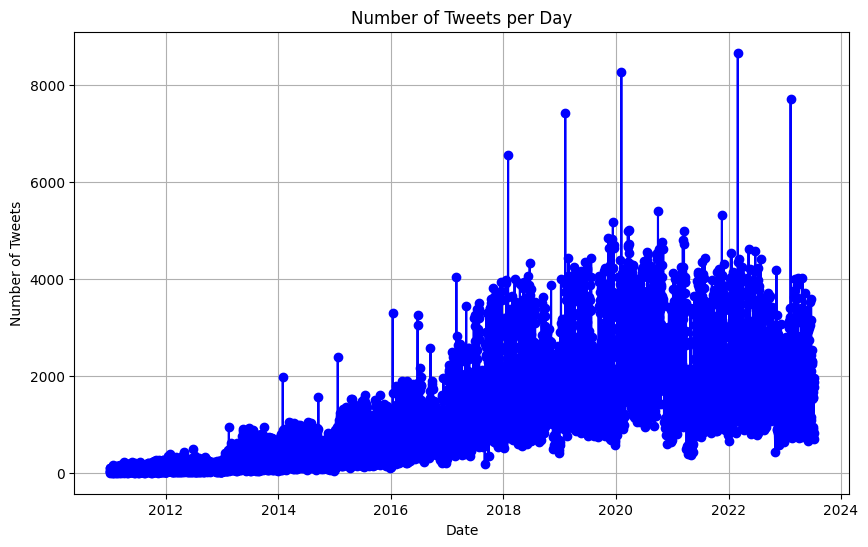

In [ ]:
#Visualizing tweets over time
df_tweets['date'] = pd.to_datetime(df_tweets['date'])

tweet_counts = df_tweets.groupby('date').size()  # Count tweets per day

plt.figure(figsize=(10,6))
plt.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', color='b')

plt.title('Number of Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()